# Linear Regression

## Maximum Likelihood Estimation 

Maximum Likelihood Estimation (MLE) is a method of estimating the parameters of a distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. 
Finding the parameter values that maximize the likelihood of making the observations given the parameters.


**Assumption for Linear Regression - Gaussian Noise Distribution** 

1. The distribution of $X$ is arbitrary 
2. If $\overrightarrow X$ and $\overrightarrow \beta$ , then $Y = \overrightarrow \beta * \overrightarrow X + \epsilon$
3. $\epsilon \sim Normal (0, \sigma ^2)$
4. $\epsilon$ is independent across observations
5. $Y$ is independent across observations give $X_i$
6. Then ($Y$ given X) $\sim Normal ( {\hat {\beta}\overrightarrow X_i}, \sigma ^2)$




**Probability Density Function for Normal Distribution**

$$P(x_i\mid \mu,\sigma^2)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x_i-\mu )^{2}}{2\sigma ^{2}}}}$$

**Bayes's Theorem**

$$ P(\theta \mid X)={\frac {P(X \mid \theta)P(\theta)}{P(X)}}\cdot $$

where likelihood funtion is $P(X \mid \theta)$ and prior distribution is $p(\theta )$

**For a Dataset, if independence holds**

$$ L = P(Y_i \mid \overrightarrow X) = P(Y_1,Y_2,...Y_n  \mid \overrightarrow X) = P(Y_1\mid x_1)P(Y_2 \mid x_2)P(Y_3\mid x_3)...P(Y_n\mid x_n) = \prod_{i=1} ^n P(Y_i \mid x_i) $$

substitute for normal PDF

$$ L = \frac{1}{\sigma ^n(2\pi)^{\frac{n}{2}}} e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n(\overrightarrow {\beta}\overrightarrow X_i)}$$

$$ \ln(L) = -n\ln(\sqrt {2\pi} \sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^n(Y_i- \overrightarrow {\beta}\overrightarrow X_i)^2$$

In order to maximize $\ln(L)$:

$$argmax_\beta[- \sum_{i=1}^n(Y_i- \overrightarrow {\beta}\overrightarrow X_i)^2]$$

Thus, $argmin_\beta[\sum_{i=1}^n(Y_i-\overrightarrow {\beta}\overrightarrow X_i)^2]$

*which is also the squared error*

In order to find the optima, we can set the first derivative equals to zero, find the weights, and then check the sign using second derivative



## Mean Squared Error and Vectorized Optimization

Similarily as MLE methods, we want to optimize parameters to have lowest mean squared error.

Let's try a vectorized optimization:

$$ E_{in}(\overrightarrow \beta)=\frac{1}{n}\sum_{i=1}^n(\overrightarrow {\beta}^T \overrightarrow {x_i} - Y_i)^2 = \frac{1}{n}\sum_{i=1}^n(\overrightarrow {x_i}^T \overrightarrow {\beta} - Y_i)^2 = \frac{1}{n}\mid\mid X\overrightarrow \beta - \overrightarrow Y \mid \mid ^2$$

$$ since \mid \mid \overrightarrow Z \mid\mid = \sqrt{\sum_{i=1}^d z_i^2} = \sqrt{\overrightarrow Z^T \overrightarrow Z}$$

$$ E_{in}(\overrightarrow \beta)= \frac{1}{n}(X\overrightarrow \beta - \overrightarrow Y)^T(X\overrightarrow \beta - \overrightarrow Y)$$

$$ \Delta_\beta E_{in}(\overrightarrow \beta^*) = \frac{1}{n}(2X^TX\overrightarrow \beta^* - 2X^T\overrightarrow Y) = 0$$

$$\overrightarrow \beta^* = (X^TX)^{-1}X^T\overrightarrow Y$$

*when the number of parameter << the dataset, we can assume X is transferable*


### One Covariate

$$ Y = \overrightarrow \beta_0 + \overrightarrow \beta_1 * X$$

$$cov(X, Y) = E((X - E(X)(Y - E(Y))) = E(XY) - \mu_X \mu_Y = \frac{1}{N}(X-\bar X)^T(Y-\bar Y)$$
$$\rho_{XY} = \frac{cov(X, Y)}{\sigma X \sigma Y} $$
$$\beta_1 = cov(X, Y) / Var(X) = \rho_{XY}\frac{\sigma Y}{\sigma X}$$
$$\beta_0 = \bar y - \beta_1 \bar x$$


## Gradient Descent

<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

# Code Demo
## Analytical Way

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
# Create 1000 Random Number
np.random.seed(42)

spending = np.random.randint(1, 10, 1000)
random_error = np.random.randn(1000)
income = 99 * spending + 1000 + 200.0 * random_error
data = np.column_stack((spending, random_error, income))

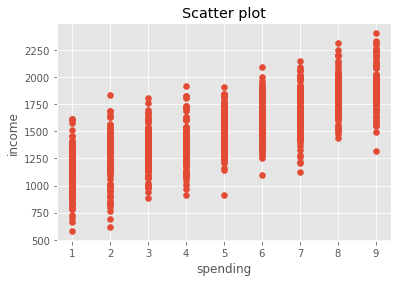

In [2]:
plt.scatter(data[:,0], data[:,2])
plt.title('Scatter plot')
plt.xlabel('spending')
plt.ylabel('income')
plt.show()

In [3]:
Y = data[:,2]
X = data[:,0]

In [42]:
cov = np.cov(X, Y, bias=False)[0][1]
var_x = np.cov(X, bias=False)
beta_1 = cov/var_x
beta_0 = np.mean(Y)-beta_1*np.mean(X)

In [43]:
print('Estimated Beta 0 is: {}, Estimated Beta 1 is: {}'.format(beta_0,beta_1))

Estimated Beta 0 is: 1020.3621978120855, Estimated Beta 1 is: 98.33766224185081


In [44]:
X_b = np.c_[np.ones((1000,1)),X]
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(beta_best)

[1020.36219781   98.33766224]


In [45]:
pred = beta_0 + beta_1 * X
mse = np.matmul((Y - pred).T,(Y - pred)) / 1000
mse
# np.sum(np.square((Y - pred))) / 1000

39414.873393215494

Text(0, 0.5, '$y$')

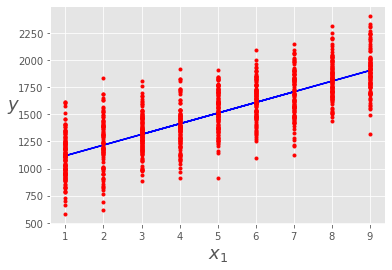

In [53]:
plt.plot(X,pred,'b-')
plt.plot(X,Y,'r.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

## Check with Sklearn

In [47]:
from sklearn.linear_model import LinearRegression
import sklearn
reg = LinearRegression().fit(X.reshape((1000,1)), Y.reshape((1000,1)))
print ([reg.coef_, reg.intercept_])

[array([[98.33766224]]), array([1020.36219781])]


In [48]:
pred2 = reg.predict(X.reshape((1000,1)))

In [49]:
sklearn.metrics.mean_squared_error(Y, pred2)

39414.873393215494

## Gradient Descent

In [51]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/m) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
lr =0.01
n_iter = 10000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,Y.reshape(1000,1),theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))    

Theta0:          1020.362,
Theta1:          98.338
Final cost/MSE:  39414.873


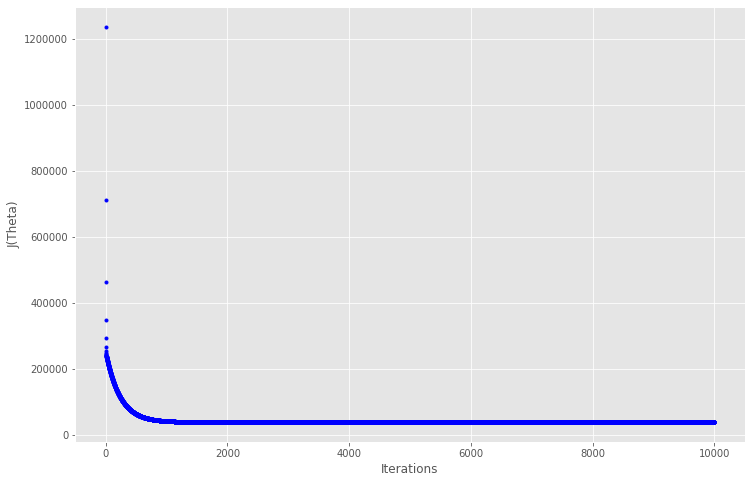

In [54]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

***
**Reference**

Learning From Data (http://amlbook.com/)

Maximum Likelihood Wikipedia https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

Estimating simple linear regression II https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/06/lecture-06.pdf

Gradient Descent in Python: https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

washu_data_analytics_foundation: https://github.com/DihuiLai/washu_data_analytics_foundation